> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project which i chose from the list is of No-show/Show Appointments.
The csv file for the project is available on the link provided and i will be exploring this file in the below sections of code and markdown cells mainly to check if any duplicates and null or missing values or absurd values in the dataset and will be taking the actions accordingly and will also mention sectionwise what all actions i am taking at each step going forward.

In this project mainly i will try to find the answer for the typical Question of "Why No-Show happened for a paitent" and what are the main factors responsible for the No-Show and how can we correctly predict in future based on this dataset in abest possible way wether a person with certain information will Show-up for the future Appointments or not?

Following columns are available in the csv file:-

01 - PatientId,
02 - AppointmentID 
03 - Gender Male or Female 
04 - ScheduledDay of appointment,  
05 - AppointmentDay on which appointment made
06 - Age 
07 - Neighbourhood Where the appointment takes place
08 - Scholarship meaning paintent has Bolsa_Fam govt facility or not 
09 - Hipertension 
10 - Diabetes 
11 - Alcoholism 
12 - Handcap  
13 - SMS_received  by paitent or not
14 - No-show , if 'No' paitent show-up and if 'Yes' paitnet didn't show up for appointment

Following Questions i can think of as of now which will mainly be answered inorder to predict No-Show/Show for paitents in future:-

1)Paiteints with Scholarship appear for Appointments mainly or not.

2)Is that Age of paitent playing important role in its inability to Show for Appointment

3)Paintents health issues such as Hypertension and Diabetes and being Alcoholic is his main inability to turn-up for the Appointment

4)Are there any combination factors such as Old Age with Diabetes/Hypertension and Alcoholism or Neighbourhood of Hospital mainly affecting paintents.

5)Lastly simply beacause Paitnets not received reminder/sceduled SMS is the main or one of the important factor of Appointment No-Show




In [3]:
# importing pandas , numpy and matplotlib and seaborn for my project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns 

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


There are 13 Independent Variables -> ['PatientId' 'AppointmentID' 'Gender' 'ScheduledDay' 'AppointmentDay' 'Age' 'Neighbourhood' 'Scholarship' 'Hipertension' 'Diabetes' 'Alcoholism' 'Handicap' 'SMS-Received']
The Dependent Variable is -> ['No-Show']


Following columns are available in the csv file:-

01 - PatientId, 02 - AppointmentID 03 - Gender Male or Female 04 - ScheduledDay of appointment,
05 - AppointmentDay on which appointment made 06 - Age 07 - Neighbourhood Where the appointment takes place 08 - Scholarship meaning paintent has Bolsa_Fam govt facility or not 09 - Hipertension 10 - Diabetes 11 - Alcoholism 12 - Handcap
13 - SMS_received by paitent or not 14 - No-show , if 'No' paitent show-up and if 'Yes' paitnet didn't show up for appointment

Following Questions i can think of as of now which will mainly be answered inorder to predict No-Show/Show for paitents in future:- 

1)Paiteints with Scholarship appear for Appointments mainly or not.

2)Are physical issues such as 'Old age' or 'Handicap' status responsible mainly for paintent's inability to Show for Appointment

3)Paintents health issues such as Hypertension and Diabetes and being Alcoholic is his main inability to turn-up for the Appointment

4)Are there any combination factors such as Old Age with Diabetes/Hypertension and Alcoholism or Neighbourhood of Hospital mainly affecting paintents.

5)Lastly simply beacause Paitnets not received reminder/sceduled SMS is the main or one of the important factor of Appointment No-Show

<a id='wrangling'></a>
## Data Wrangling

Inthis section i will be manily focusing on cleaning the data for any duplicates and null or missing values or absurd values and later will be taking the actions accordingly
### General Properties

In [4]:
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [5]:
df.tail(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110507,4.769462e+14,5786918,F,2016-06-08T09:04:18Z,2016-06-08T00:00:00Z,0,MARIA ORTIZ,0,0,0,0,0,0,No
110508,9.433654e+13,5757656,F,2016-06-01T09:41:00Z,2016-06-01T00:00:00Z,59,MARIA ORTIZ,0,0,0,0,0,0,No
110509,4.952968e+14,5786750,M,2016-06-08T08:50:51Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,0,0,0,0,0,No
110510,2.362182e+13,5757587,F,2016-06-01T09:35:48Z,2016-06-01T00:00:00Z,64,SOLON BORGES,0,0,0,0,0,0,No
110511,8.235996e+11,5786742,F,2016-06-08T08:50:20Z,2016-06-08T00:00:00Z,14,MARIA ORTIZ,0,0,0,0,0,0,No
110512,9.876246e+13,5786368,F,2016-06-08T08:20:01Z,2016-06-08T00:00:00Z,41,MARIA ORTIZ,0,0,0,0,0,0,No
110513,8.674778e+13,5785964,M,2016-06-08T07:52:55Z,2016-06-08T00:00:00Z,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No
110514,2.695685e+12,5786567,F,2016-06-08T08:35:31Z,2016-06-08T00:00:00Z,58,MARIA ORTIZ,0,0,0,0,0,0,No
110515,6.456342e+14,5778621,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110516,6.923772e+13,5780205,F,2016-06-07T07:45:16Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,0,0,0,0,0,Yes


In [6]:
df.shape

(110527, 14)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#checkin general info regarding dataset such as columns , rows datatypes and all entry rows filled or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
#checking inside some columns for exact data type instead of object 
type(df['No-show'][0])

str

In [10]:
# checking for duplicates
df.duplicated().value_counts()

False    110527
dtype: int64

In [11]:
# checking for null or missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From above we can conclude that there are no duplicates and missing values in this dataset

In [12]:
#checking how many people appeared as 'No' and not appaeared as 'Yes' for appointments
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [13]:
# checking different age values and will be fixing issues in the data later 
df['Age'].value_counts()   

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [14]:
#checking no of people with govt facility of Bosal_fam plan scholarship 
df['Scholarship'].value_counts()  

0    99666
1    10861
Name: Scholarship, dtype: int64

In [15]:
#checking hadicap people and categories
df['Handcap'].value_counts()


0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [16]:
#checking how many people received SMSes
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [17]:
#cehcking unique values in each columnsof the dataset 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning (Fixing duplicates,missings, and data types issues data mainly - As there are no duplicates and missing data so mainly need to fix data types )

In [18]:

# Droping 'PatientId' and 'AppointmentID' as they are of no use in data analysis process.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


Since Age seems to be crucial , need to check all age groups specifically in the below code

In [19]:
"Unique Values in `Age` => {}".format(np.sort(df.Age.unique()))

'Unique Values in `Age` => [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16\n  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34\n  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52\n  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70\n  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88\n  89  90  91  92  93  94  95  96  97  98  99 100 102 115]'

In [20]:
print("Patients with `Age` less than -1 -> {}".format(df[df.Age == -1].shape[0]))
print("Patients with `Age` equal to 0 -> {}".format(df[df.Age == 0].shape[0]))

Patients with `Age` less than -1 -> 1
Patients with `Age` equal to 0 -> 3539


In [29]:
#Deleting age -1 record as it seems to be a typo

df = df[df.Age >= 0]



In [30]:
#Age 0 seems to be babies, lets check that and empty rows confirmed that they are definitely infants below age 1
df[(df.Age <= 0) & ((df.Hipertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]



,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [31]:
# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')



In [32]:
# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMSReceived       110526 non-null int64
NoShow            110526 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> Here i will be checking almost every field of the dataset and also in later steps checking all the questions answers step by step


In [33]:
#lets check appointment and scedule days data to check dates for how many months
np.sort(df.AppointmentDay.dt.strftime('%Y-%m-%d').unique())
# Appointment dates are from 29 April 2016 to 08-June-2016 for 3 months

array(['2016-04-29', '2016-05-02', '2016-05-03', '2016-05-04',
       '2016-05-05', '2016-05-06', '2016-05-09', '2016-05-10',
       '2016-05-11', '2016-05-12', '2016-05-13', '2016-05-14',
       '2016-05-16', '2016-05-17', '2016-05-18', '2016-05-19',
       '2016-05-20', '2016-05-24', '2016-05-25', '2016-05-30',
       '2016-05-31', '2016-06-01', '2016-06-02', '2016-06-03',
       '2016-06-06', '2016-06-07', '2016-06-08'], dtype=object)

In [34]:
np.sort(df.ScheduledDay.dt.strftime('%Y-%m-%d').unique())
#Scheduled dates are from 10-Nov-2015 to 08-June-2016.  for 8 months

array(['2015-11-10', '2015-12-03', '2015-12-07', '2015-12-08',
       '2015-12-14', '2015-12-15', '2016-01-04', '2016-01-05',
       '2016-01-07', '2016-01-11', '2016-01-13', '2016-01-14',
       '2016-01-19', '2016-01-20', '2016-01-21', '2016-01-22',
       '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28',
       '2016-01-29', '2016-02-01', '2016-02-02', '2016-02-03',
       '2016-02-04', '2016-02-05', '2016-02-11', '2016-02-12',
       '2016-02-15', '2016-02-16', '2016-02-17', '2016-02-18',
       '2016-02-19', '2016-02-22', '2016-02-23', '2016-02-24',
       '2016-02-25', '2016-02-26', '2016-02-29', '2016-03-01',
       '2016-03-02', '2016-03-03', '2016-03-04', '2016-03-05',
       '2016-03-07', '2016-03-08', '2016-03-09', '2016-03-10',
       '2016-03-11', '2016-03-14', '2016-03-15', '2016-03-16',
       '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-21',
       '2016-03-22', '2016-03-23', '2016-03-28', '2016-03-29',
       '2016-03-30', '2016-03-31', '2016-04-01', '2016-

In [35]:
#normalise dataset No show column to check No-Show, Show % for appointments
df['NoShow'].value_counts(normalize=True)

#Result below shows that about 80% of people have showed up while the other 20% unfortunalty did not

No     0.798066
Yes    0.201934
Name: NoShow, dtype: float64

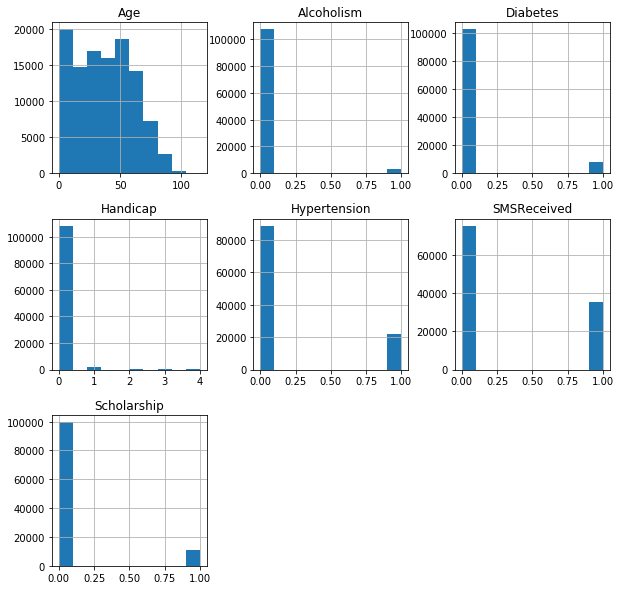

In [36]:
#Checking histagrams now to get better understanding of data

df.hist(figsize = (10,10));

#From below figure, at a first glance we are able to see that proportion of people with Alcohol and Diabetes seems quite less 
#and people who are handicaped are also very less
#but people who has Hypertension and people who received SMS seems significant which cant be ignored and needs to be exploredd further 
#Age anyways seems important for analysis which we will be checking independently below and people of different age group
#especially till age 55 seems almost in same proportion but as age increases proportion of people getting down n down



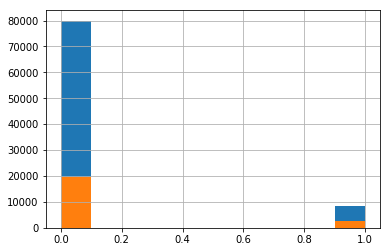

In [37]:
#Lets try to find out answer for first question and start exploring Scholarship option for NoShow
df.groupby('NoShow').Scholarship.hist();

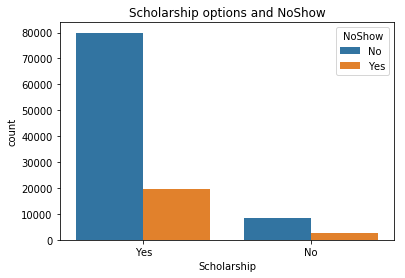

In [38]:
ax = sns.countplot(x=df.Scholarship, hue=df.NoShow, data=df)
ax.set_title("Scholarship options and NoShow")
x_ticks_labels=['Yes', 'No']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#Its preety evident now that people with No Scholarship or No Govt facility Bosal_Fam plan skipping the appointments 

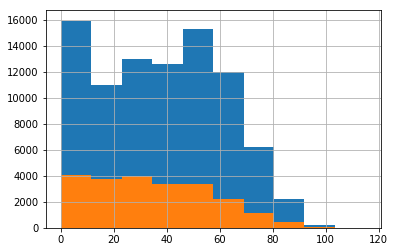

In [39]:
#2)Is that Age of paitent playing important role in its inability to Show for Appointment

#Check Age wise No show , Show 

df.groupby('NoShow').Age.hist();

#Below figure showing most of the paitents are in age group 0-10 and 50-60 and they skipped the appointments
#Also we can conclude that kids dependent on parents and old age people dependent skipping the appointments in large numbers proportionately

In [40]:
#3)Paintents health issues such as Hypertension and Diabetes and being Alcoholic is his main inability to turn-up for the Appointment

df.Hypertension.value_counts(normalize=True) * 100 


0    80.275229
1    19.724771
Name: Hypertension, dtype: float64

In [41]:
df.Diabetes.value_counts(normalize=True) * 100 

0    92.813456
1     7.186544
Name: Diabetes, dtype: float64

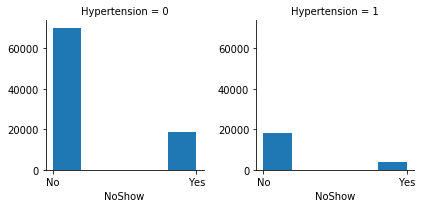

In [42]:
#plotting for hypertension
g = sns.FacetGrid(df, col='Hypertension')
g.map(plt.hist, 'NoShow', bins=5);

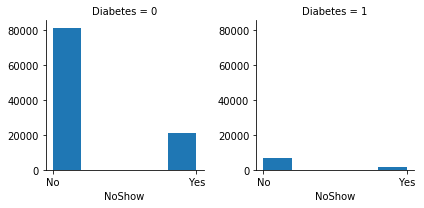

In [43]:
#plotting for Diabetes
g = sns.FacetGrid(df, col='Diabetes')
g.map(plt.hist, 'NoShow', bins=5);

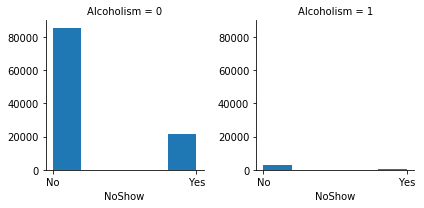

In [44]:
#plotting for No show due to Alcoholism
g = sns.FacetGrid(df, col='Alcoholism')
g.map(plt.hist, 'NoShow', bins=5);

#Clearly people with Alcoholism not responsile for skipping appointments so can't consoder it as significant factor

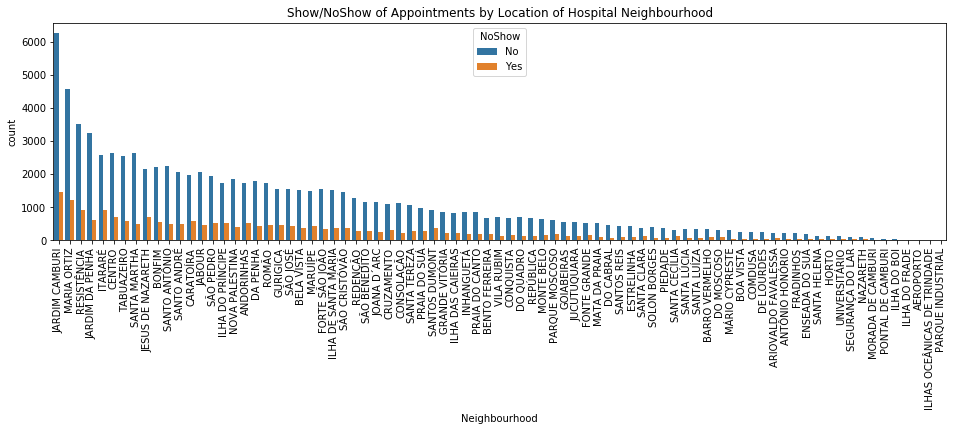

In [46]:
#4)Are there any combination factors such as Old Age with Diabetes/Hypertension and Alcoholism or Neighbourhood of Hospital mainly affecting paintents.

plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df["Neighbourhood"] , hue = df["NoShow"] , order =df["Neighbourhood"].value_counts().index)
ax.set_title("Show/NoShow of Appointments by Location of Hospital Neighbourhood")
plt.show()

#It seems most of the appointments made at Jardium location and Show, NoShow proportion is almost same for any location
#but significantly very less appointments skipped by paitents at  Jardium location

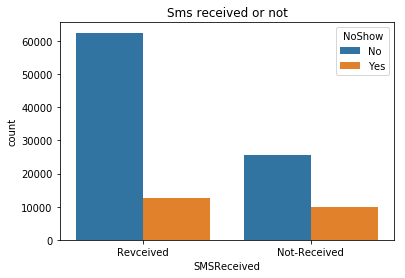

In [47]:
#5)Lastly simply beacause Paitnets not received reminder/sceduled SMS 
#is the main or one of the important factor of Appointment No-Show

ax = sns.countplot(x=df.SMSReceived, hue=df.NoShow, data=df)
ax.set_title("Sms received or not")
x_ticks_labels=['Revceived','Not-Received']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#From below plot we can see that people who received sms skipped proportionately less appointments than the people who 
# hasn't received it

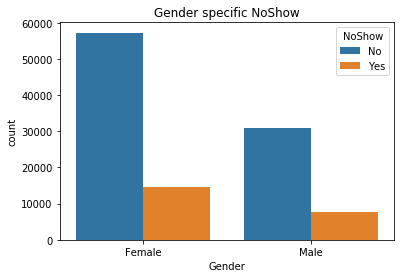

In [48]:
#Genderwise distribution i think also important to explore before coming to conclusions


ax = sns.countplot(x=df.Gender, hue=df.NoShow, data=df)
ax.set_title("Gender specific NoShow")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#We can infer that women skipping their appointments mostly

<a id='conclusions'></a>
## Conclusions



Final Conclusion points from the Exploratory data Analysis performed will be as follows:- 

1)It seems most of the appointments made at Jardium location and Show, NoShow proportion is almost same for any location but significantly very less appointments skipped by paitents at  Jardium location

2)We can infer that women skipping their appointments mostly

3)We can see that people who received sms skipped proportionately less appointments than the people who 
hasn't received it

4)Clearly people with Alcoholism not responsile for skipping appointments so can't consoder it as significant factor

5)Most of the paitents are in age group 0-10 and 50-60 and they skipped the appointments

6)Also we can conclude that kids dependent on parents and old age people dependent skipping the appointments in large numbers proportionately

7)Its concluded now that people with No Scholarship or No Govt facility Bosal_Fam plan skipping the appointments



## Limitations

1)For Appointments , we have only 3 months od data avilable to analyse however inorder to predict with more confidence an year data would have been very helpful therefore this specific missing information could misbalance the findings.

2)Also if we are considering this analysis to be for entire population of a city/state , then only 81 Neighbourhood data is very much less and can deviate the prediction little bit.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])